#cycloneanalyzer


In [99]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import math

img1=cv2.imread("./1.jpg")
img2=cv2.imread("./2.jpg")
img3=cv2.imread("./3.jpg")


show image1

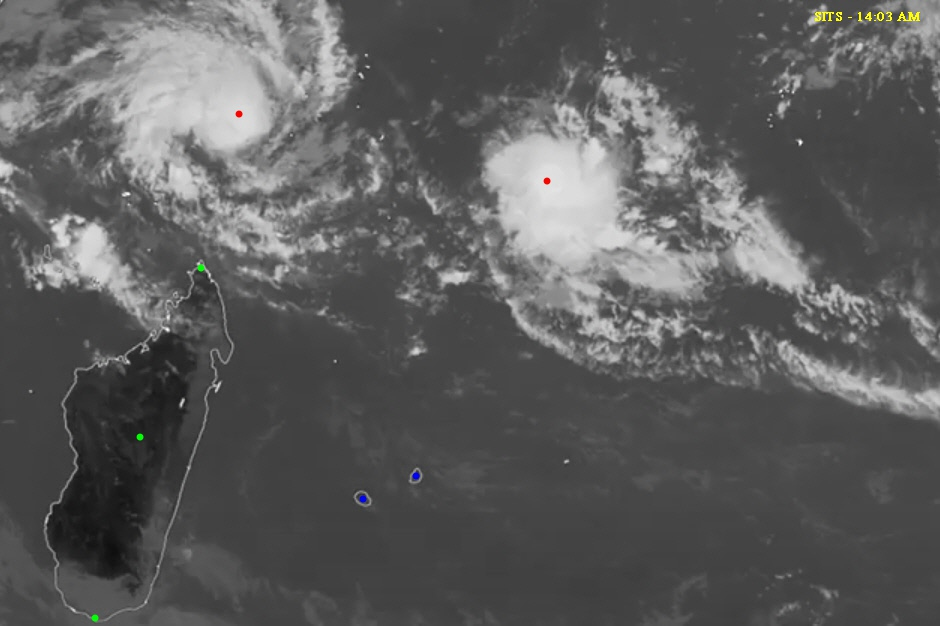

In [100]:
cv2_imshow(img1)

show image2

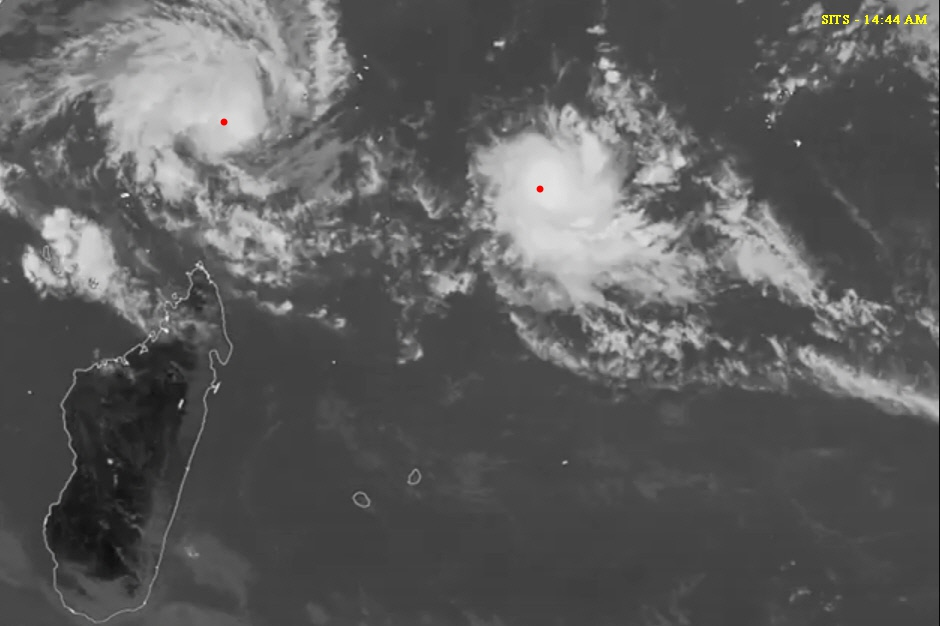

In [101]:
cv2_imshow(img2)

show image 3

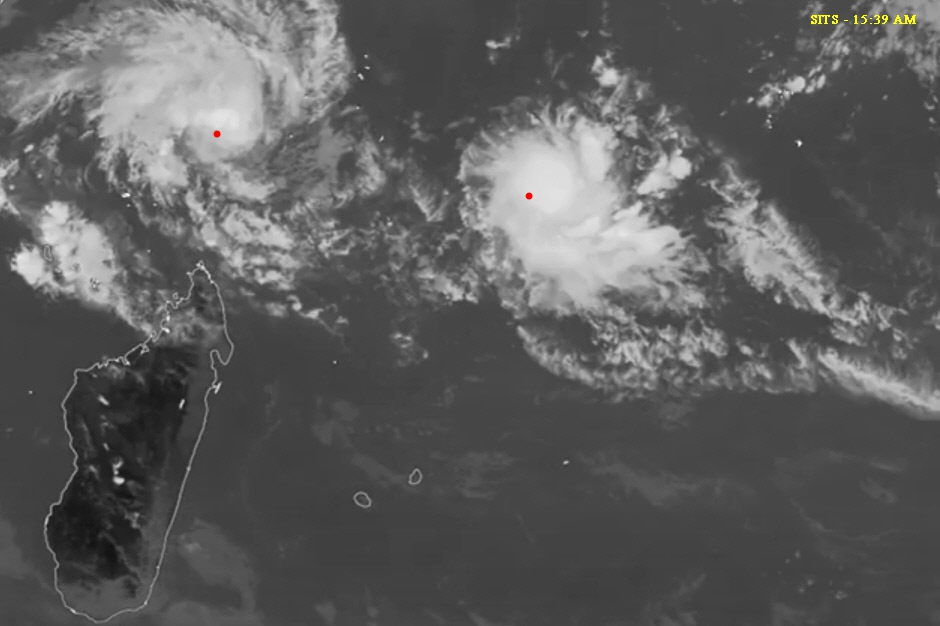

In [102]:
cv2_imshow(img3)

merge image 1,2,3 in one image

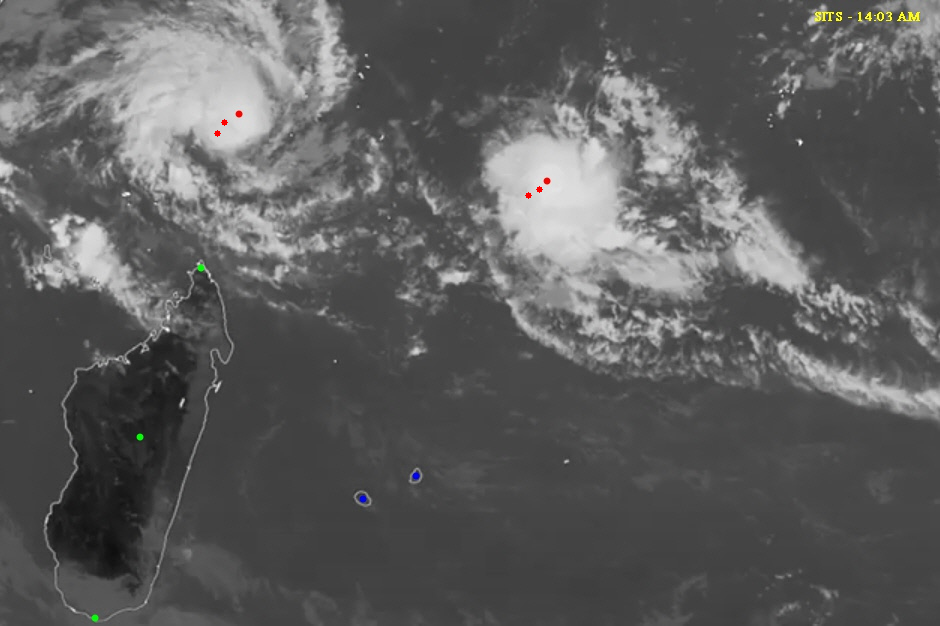

In [103]:
img1=cv2.circle(img1,(224,122),3,(0,0,255),-1)
img1=cv2.circle(img1,(539,189),3,(0,0,255),-1)
img1=cv2.circle(img1,(528,195),3,(0,0,255),-1)
img1=cv2.circle(img1,(217,133),3,(0,0,255),-1)
cv2_imshow(img1)

# find all point pixels value--                      

belna cyclone in image1=(239,114) ,               

ambali cyclone in image1=(546,181) , 

Antsiranana(uppar point of medagaskar)=(200,267)  ,           
Benonoka(lower point of medagaskar)=(94,617)  ,  
antananarivo=(140,436)

Mauritius=(415,475),

reunion=(363,500)


now we have all point pixels 
now we make a line in image that divide image in two part 
which denote that both side the km/pixels is differnt.        


now end point of line is (350,0) and (350,625)  

now we draaw line in image1



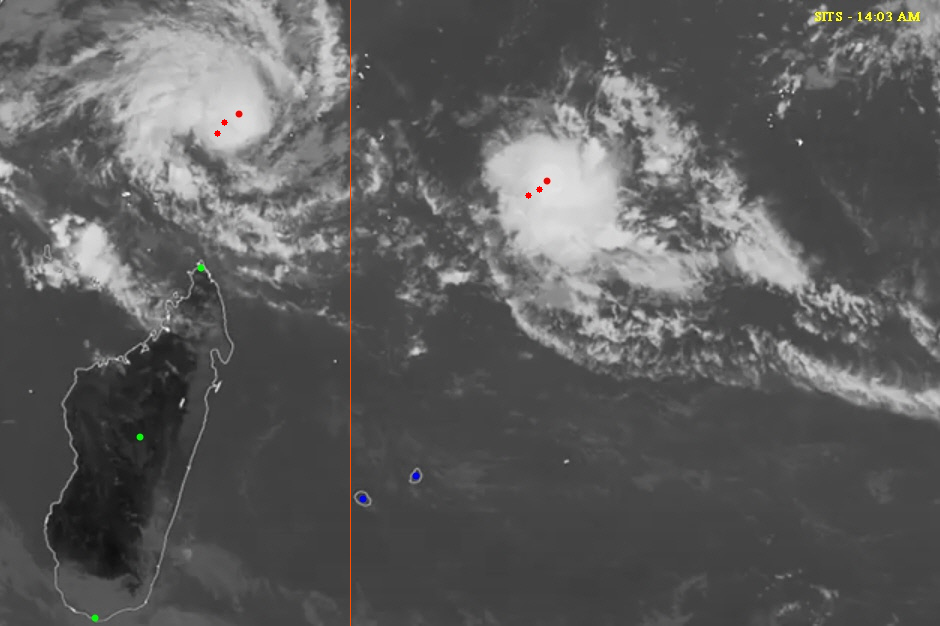

In [104]:
img1 = cv2.line(img1, (350,0),(350,625),(0,78,255), 1)
cv2_imshow(img1)

# find km/pixels
on left side the km/pixels value is= (distance between uppar and lower part)/pixels difference    
=> 1500/sqrt((617-267)*(617-267)+(200-94)*(200-94))=4.209283795262692 km/pixels

on rightside pixels value is => 250/sqrt((415-363)*(415-363)+(500-475)*(500-475))=   4.3329443486787795 km/pixels

In [105]:
left_pixels=1500/(math.sqrt((617-267)*(617-267)+(200-94)*(200-94)))
right_pixels=250/(math.sqrt((415-363)*(415-363)+(500-475)*(500-475)))

print(left_pixels,right_pixels)

4.101730237759558 4.3329443486787795


# ***find the avg velocity of cyclone***
*for cyclone 1 by image 1 and 3* =>  
the time between image1and image2 is 41 min or .684 hours  
 the time between image2and image2 is 55 min or .91 hours 
km/pixels value for cyclone one=> left_pixels

so the avg velocity => ((pixel distanse)*(km/pixels))/time taken  
=> v11=(sqrt((239-224)*(239-224)+(122-114)*(122-114))*left_pixels/.684   
  
 
v22=(sqrt((224-217)*(224-217)+(133-122)*(133-122))*left_pixels/.91 
v1=(v11+v22)/2

for cyclone 2 by image 1 and 3 =>
time=1.6 hours  
km/pixels=right_pixels 
v21=(sqrt((574-539)*(574-539)+(189-181)*(189-181)))*right_pixels/.684  
v22=(sqrt((539-528)*(539-528)+(195-189)*(195-189)))*right_pixels/.91 

v2=(v11+v22)/2


In [106]:
v11=(math.sqrt((239-224)*(239-224)+(122-114)*(122-114))*left_pixels)/.684
v12=(math.sqrt((224-217)*(224-217)+(133-122)*(133-122))*left_pixels)/.91
v21=(math.sqrt((546-539)*(546-539)+(189-181)*(189-181))*right_pixels)/.684
v22=(math.sqrt((539-528)*(539-528)+(195-189)*(195-189))*right_pixels)/.91
v1=(v11+v12)/2
v2=(v21+v22)/2
print(v1,v2)

80.35641985896221 63.5000363607697


# ** find intersection point**  

 now find equation of cyclone path assume they move in straight line and point are image2 image3 point for stright line  
y=m*x+c  
where m=(y2-y1)/x2-x1   we know two points in image2 and image3

for cyclone 1 equation is 
7y+11x-3318=0

for cyclone 2 equarion is   

11y+6x-5313=0  

now find the intersection point of these line =>
  

# intersection point of line  
now we use numpy to solve it 


In [107]:
a=np.array([[11,7],[6,11]])
b=np.array([3318,5313])
d=np.linalg.solve(a,b)
intersection_x,intersection_y=d
print(intersection_x,intersection_y)

-8.772151898734178 487.7848101265823


**onsolving we get intersection point =(-8.7721519 , 487.78481013)**

# Distance from Antananarivo to  the intersection point  
the pixels value of Antananarivo => (140,436)  

distance=(sqrt((140+intersection_x)*(140+intersection_x)+(intersection_y-436)*(intersection_y-436))*left_pixels)=>  619.4163542991223 km





In [108]:
distance=(math.sqrt((140-intersection_x)*(140-intersection_x)+(intersection_y-436)*(intersection_y-436))*left_pixels)
print(distance)

646.1340925363467


# find time when cyclone reach the intersection point   
**for belna** -
belna pixles value= 239,114 
find the pixels distance and multiple by left_pixels value and we got distance from intial point and intersection point for belna  
time=distance/velocity   
t1=(sqrt((239-intersection_x)*(239-intersection_x)+(114-intersection_y)*(114-intersection_y))*left_pixels)/v1    hours

In [109]:
t1=(math.sqrt((239-intersection_x)*(239-intersection_x)+(114-intersection_y)*(114-intersection_y)))*left_pixels/v1
print(t1)

22.890704679902385


**for ambala** 
there is a interesting fact => if the cyclone in left of the draw line we use right_pixels value and as the cyclone pass the draw line the pixels value chane after it we use left_pixels value so first we found the intersection point of draw line and ambala cyclone line ans as we find intersection point we find distance between this intersecton point and multiply it by right_pixels and then we find distance between both intersection point and this intersection point and multiple by left_pixels value   
and we find the distance then we find time 
  so first we find the intersection point of draw line and amabala line -  
  draw line equation => y=350   
  and equation of ambala  => 7y+11x-3318=0  
  we find intersection using numpy =>  x1=78  , y1=350  


In [110]:
a1=np.array([[11,7],[0,1]])
b1=np.array([3318,350])
d1=np.linalg.solve(a1,b1)
intersection_x1,intersection_y1=d1
print(intersection_x1,intersection_y1)

78.9090909090909 350.0


*now find the time for ambala*  
ambala pixels=574,181

t21=((sqrt((574-intersection_x1)*(574-intersection_x1)+(181-intersection_y1)*(181-intersection_y1)))*right_pixels/v2)  
t22=((sqrt((intersection_x1-intersection_x)*(intersection_x1-intersection_x)+(intersection_y-intersection_y1)*(intersection_y-intersection_y1)))*left_pixels/v2)  
t2=t21+t22


In [111]:
t21=(((math.sqrt((546-intersection_x1)*(546-intersection_x1)+(intersection_y1-181)*(intersection_y1-181)))*right_pixels)/v2)
t22=((math.sqrt((intersection_x1-intersection_x)*(intersection_x1-intersection_x)+(intersection_y-intersection_y1)*(intersection_y-intersection_y1)))*left_pixels/v2)  
t2=t21+t22
print(t2)

44.443489396143484


# result  
the time of both cyclone is different so they do not collide
